In [1]:
import pandas as pd
import os
import numpy as np
import glob
import tarfile

# plot parameters

In [24]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

import pandas as pd

16152


In [25]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})   

In [26]:
import ImageAnalysis3.structure_tools.distance as distance

# get all fnames

In [80]:
hic_main_folder = r'\\10.245.74.212\Chromatin_NAS_2\m3C_mouse_brain\isocortex'

hic_tsv_folder = os.path.join(hic_main_folder, r'download')
hic_matrix_folder = os.path.join(hic_main_folder, r'matrix')


hic_matrix_fname_list = glob.glob(hic_matrix_folder+r'\*')
hic_matrix_fname_list = [f for f in hic_matrix_fname_list if '.pkl' in f]
print(len(hic_matrix_fname_list))
hic_matrix_fname_list[:3]

10839


['\\\\10.245.74.212\\Chromatin_NAS_2\\m3C_mouse_brain\\isocortex\\matrix\\CEMBA3C_10A3C_R2_P2-1-K18-A14.3C.contact.matrix.pkl',
 '\\\\10.245.74.212\\Chromatin_NAS_2\\m3C_mouse_brain\\isocortex\\matrix\\CEMBA3C_10A3C_R2_P2-1-K18-B1.3C.contact.matrix.pkl',
 '\\\\10.245.74.212\\Chromatin_NAS_2\\m3C_mouse_brain\\isocortex\\matrix\\CEMBA3C_10A3C_R2_P2-1-K18-B2.3C.contact.matrix.pkl']

# merge for selected chromosome

In [81]:
import pickle
import tqdm

chosen_chrom = 'chr4'

hic_matrix_chr_list = []
for hic_matrix_fname in tqdm.tqdm(hic_matrix_fname_list):
    hic_matrix_dict = pickle.load(open(hic_matrix_fname,'rb'))
    hic_matrix_chr = hic_matrix_dict[chosen_chrom]
    hic_matrix_chr_list.append(hic_matrix_chr)
    
hic_matrix_chr_arr = np.array(hic_matrix_chr_list)
hic_matrix_chr_arr.shape

100%|████████████████████████████████████████████████████████████████████████████| 10839/10839 [04:03<00:00, 44.51it/s]


(10839, 122, 122)

C:\Users\shiwei\AppData\Local\Temp\2\ipykernel_16152\477782803.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


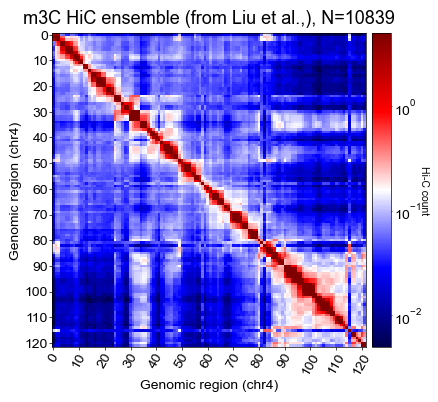

In [82]:
#%matplotlib notebook
%matplotlib inline
from matplotlib.colors import LogNorm


median_hic_matrix_chr =  np.nanmedian(hic_matrix_chr_arr, axis=0)
median_hic_matrix_chr =  np.nanmean(hic_matrix_chr_arr, axis=0)
#hic_mat_chr = median_hic_matrix_chr
hic_mat_chr = median_hic_matrix_chr + median_hic_matrix_chr.T - np.diag(np.diag(median_hic_matrix_chr))
#plt.style.use('dark_background')
#plt.style.use('default')
_single_im_size=3

sort_by_region = False


hic_cmap = matplotlib.cm.get_cmap('seismic')
hic_cmap.set_bad(color=[0.,0.,0.,1])
#hic_limits = [10, 5000]
hic_limits = [0.005, 5]

#hic_norm = LogNorm(vmin=np.min(hic_limits), 
          # vmax=np.max(hic_limits))


fig, axes = plt.subplots(1, 1, figsize=(_single_im_size*2, _single_im_size*1.1), dpi=100, sharex=True, sharey=True)


ia.figure_tools.distmap.plot_distance_map(hic_mat_chr, 
                   cmap=hic_cmap,
                   color_limits=hic_limits,
                   #color_norm=hic_norm,
                   color_norm='log',
                   ax=axes, 
                ticks=[i for i in np.arange(0,len(hic_mat_chr)) if i%10==0],
                tick_labels=[i for i in np.arange(0,len(hic_mat_chr)) if i%10==0],
                   ax_label=f'Genomic region ({chosen_chrom})', 
                   colorbar_labels='Hi-C count',
                   save=False, 
                   #save_basename=fig_basename,
                   font_size=10)


axes.set_title(f'm3C HiC ensemble (from Liu et al.,), N={len(hic_matrix_chr_list)}', fontsize=13, pad=7)

#axes.hlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
#axes.vlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
axes.xaxis.set_tick_params(which='both', labelbottom=True)
axes.yaxis.set_tick_params(which='both', labelleft=True)

fig.subplots_adjust(wspace=0.2, hspace=0.2, left=0.05, right=0.95, top=0.97, bottom=0.02)
#fig.suptitle(f"{_class}, N={len(class_2_chr_zxys[_class])}", fontsize=10, y=0.97)
#fig.suptitle(f"{_class}, N={len(class_2_cellInfoList[_class])}", fontsize=10, y=0.97)
#fig.savefig(os.path.join(output_figure_folder, f"Cis-HiC_map_chr_{chosen_chrom}.pdf"),
            #bbox_inches='tight', dpi=300)
fig.show()

C:\Users\shiwei\AppData\Local\Temp\2\ipykernel_16152\477782803.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


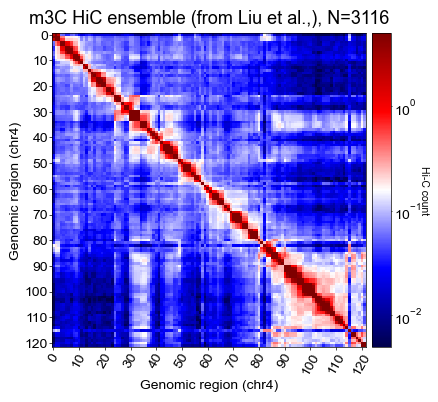